# Data Bootcamp Final Project: Who deserves to be NBA MVP?
## Vincent Booth & Sam Praveen

Background:
    The topic of which NBA player is most deserving of the MVP is always a contentious one. Fans will endlessly debate which of their favorite players has had a more tangible impact on their respective teams as well as who has the better stat lines. We recognize that statistics such as points, assists, and rebounds do not tell enough of a story or give enough information to definitively decide who is more deserving of the award.

Process:
    For simplicity sake, we will focus on four players who we believe have earned the right to be in the conversation for MVP: James Harden, Lebron James, Kawhi Leonard, and Russell Westbrook. We will use the advanced statistics that we gather from sources such as espn.com and basketball-reference.com to compare the performance of these four players to see who is in fact more valuable. In addition, we will go back to 1980 and take the stats for each MVP from that season onwards and try to look for any patterns or trends that will be able to serve as predictors for who will win the award this season. 

## James Harden

James Harden is a guard for the Houston Rockets. He joined the Rockets in 2012 and has been a leader for the team ever since. He is known as a prolific scorer, being able to score in the paint and from three-point range alike. He lead the Rockets to a 3rd place finish in the Western Conference with a record of 55-27, and are currently in the conference semi-finals against the San Antonio Spurs

## Kawhi Leonard

Kawhi Leonard is a forward for the San Antonio Spurs. He was drafted by San Antonio in 2011 and broke out as a star after the 2014 Finals, in which he lead his team to victory over the LeBron James led Miami Heat. Since then Kawhi has been known for being a very complete, consistent, and humble player - a reflection of the team and coach he plays for. Leonard led the Spurs to a 2nd place finish in the West with a record of 61-21 and is currently in the conference semis against the Houston Rockets

## LeBron James

LeBron James is a forward for the Cleveland Cavaliers. He was drafted by the Cavaliers in 2003, and after a stint with the Miami Heat, returned to Cleveland in 2014. James excels in nearly every aspect of the game, as he has already put together a Hall of Fame career and put his name in the conversation for greatest player of all time, although there is some debate about that. James lead the Cavaliers to a 2nd place finish in the Eastern Conference, and is currently in the conference semi's agaisnt the Toronto Raptors.

## Russell Westbrook

Russell Westbrook is a guard for the Oklahoma City Thunder. He was drafted by OKC in 2008, and become the sole leader of the team this season when Kevin Durant left for the Golden State Warriors. Westbrook is known for his athleticism as well as passion on the court. Westbrook has taken an expanded role on the court for the Thunder this year, and lead them in almost every statistical category. He lead OKC to a 6th place finish in the West with a record of 47-35. They were eliminated in the first round in 5 games to the Houston Rockets.

In [1]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import datetime as dt           # date tools, used to note current date  
import requests
from bs4 import BeautifulSoup
import urllib.request
from matplotlib.offsetbox import  OffsetImage

%matplotlib inline

In [2]:
#per game statistics for MVP candidates
url = 'http://www.basketball-reference.com/play-index/pcm_finder.fcgi?request=1&sum=0&player_id1_hint=James+Harden&player_id1_select=James+Harden&player_id1=hardeja01&y1=2017&player_id2_hint=LeBron+James&player_id2_select=LeBron+James&y2=2017&player_id2=jamesle01&player_id3_hint=Kawhi+Leonard&player_id3_select=Kawhi+Leonard&y3=2017&player_id3=leonaka01&player_id4_hint=Russell+Westbrook&player_id4_select=Russell+Westbrook&y4=2017&player_id4=westbru01'
cl = requests.get(url)

In [3]:
soup = BeautifulSoup(cl.content, 'html.parser')

In [4]:
column_headers = [th.getText() for th in 
                  soup.findAll('tr')[0].findAll('th')]

In [5]:
data_rows = soup.findAll('tr')[1:]

In [6]:
player_data = [[td.getText() for td in data_rows[i].findAll('td')]
            for i in range(len(data_rows))]

In [7]:
df = pd.DataFrame(player_data, columns=column_headers[1:])

In [8]:
df = df.set_index('Player')

In [9]:
df = df.sort_index(ascending = True)

In [10]:
#getting advanced statistics for MVP candidates
url1 = 'http://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&per_minute_base=36&per_poss_base=100&type=advanced&season_start=1&season_end=-1&lg_id=NBA&age_min=0&age_max=99&is_playoffs=N&height_min=0&height_max=99&year_min=2017&year_max=2017&birth_country_is=Y&as_comp=gt&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&force%3Apos_is=1&c6mult=1.0&order_by=ws'
bl = requests.get(url1)

In [11]:
soup1 = BeautifulSoup(bl.content, 'html.parser')

In [12]:
column_headers_adv = [th.getText() for th in 
                  soup1.findAll('tr')[1].findAll('th')]

In [13]:
data_rows_adv = soup1.findAll('tr')[2:8]

In [14]:
player_data_adv = [[td.getText() for td in data_rows_adv[i].findAll('td')]
            for i in range(len(data_rows_adv))]

In [15]:
df_adv = pd.DataFrame(player_data_adv, columns=column_headers_adv[1:])

In [16]:
df_adv = df_adv.set_index('Player')

In [17]:
#drop other players from list
df_adv = df_adv.drop(['Rudy Gobert', 'Jimmy Butler'])

In [18]:
#sort players alphabetically
df_adv = df_adv.sort_index(ascending = True)

In [19]:
#drop duplicate and unnecessary columns
df_adv = df_adv.drop(['Season', 'Age', 'Tm', 'Lg', 'G', 'GS', 'MP'], axis=1)

In [20]:
#combined table of per game and andvanced statistics
MVP = pd.concat([df, df_adv], axis=1)
MVP

,Season,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,USG%,ORtg,DRtg,OWS,DWS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,
James Harden,2016-17,27,81,81,36.4,8.3,18.9,.440,3.2,9.3,...,34.2,118,107,11.5,3.6,.245,8.7,1.5,10.1,9.0
Kawhi Leonard,2016-17,25,74,74,33.4,8.6,17.7,.485,2.0,5.2,...,31.1,121,102,8.9,4.7,.264,6.4,1.5,7.9,6.2
LeBron James,2016-17,32,74,74,37.8,9.9,18.2,.548,1.7,4.6,...,30.0,119,108,9.8,3.0,.221,6.8,1.6,8.4,7.3
Russell Westbrook,2016-17,28,81,81,34.6,10.2,24.0,.425,2.5,7.2,...,41.7,112,104,8.5,4.6,.224,10.9,4.7,15.6,12.4


In [21]:
#convert to proper dtypes
MVP = MVP.apply(pd.to_numeric, errors='ignore')

In [22]:
#get per game statistics for MVP winners since 1980
url2 = 'http://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&type=per_game&per_minute_base=36&per_poss_base=100&season_start=1&season_end=-1&lg_id=NBA&age_min=0&age_max=99&is_playoffs=N&height_min=0&height_max=99&year_min=1981&year_max=2017&birth_country_is=Y&as_comp=gt&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&force%3Apos_is=1&award=mvp&c6mult=1.0&order_by=season'
al = requests.get(url2)

In [23]:
soup2 = BeautifulSoup(al.content, 'html.parser')

In [24]:
column_headers_past = [th.getText() for th in 
                  soup2.findAll('tr')[1].findAll('th')]

In [25]:
data_rows_past = soup2.findAll('tr')[2:]

In [26]:
player_data_past = [[td.getText() for td in data_rows_past[i].findAll('td')]
            for i in range(len(data_rows_past))]

In [27]:
df_past = pd.DataFrame(player_data_past, columns=column_headers_past[1:])

In [28]:
df_past = df_past.set_index('Player')

In [29]:
df_past = df_past.drop(['Tm', 'Lg'], axis=1)

In [30]:
#drop row of null values, which was used to separate decades on the Basketball Reference website
df_past = df_past.dropna(axis=0)

In [31]:
#get advanced statistics for MVP winners since 1980
url3 = 'http://www.basketball-reference.com/play-index/psl_finder.cgi?request=1&match=single&per_minute_base=36&per_poss_base=100&type=advanced&season_start=1&season_end=-1&lg_id=NBA&age_min=0&age_max=99&is_playoffs=N&height_min=0&height_max=99&year_min=1981&year_max=2017&birth_country_is=Y&as_comp=gt&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&force%3Apos_is=1&award=mvp&c6mult=1.0&order_by=season'
dl = requests.get(url3)

In [32]:
soup3 = BeautifulSoup(dl.content, 'html.parser')

In [33]:
column_headers_past_adv = [th.getText() for th in 
                  soup3.findAll('tr')[1].findAll('th')]

In [34]:
data_rows_past_adv = soup3.findAll('tr')[2:]

In [35]:
player_data_past_adv = [[td.getText() for td in data_rows_past_adv[i].findAll('td')]
            for i in range(len(data_rows_past_adv))]

In [36]:
df_past_adv = pd.DataFrame(player_data_past_adv, columns=column_headers_past_adv[1:])

In [37]:
df_past_adv = df_past_adv.set_index('Player')

In [38]:
#drop duplicate and unnecessary columns
df_past_adv = df_past_adv.drop(['Age', 'Tm', 'Lg', 'Season', 'G', 'GS', 'MP'], axis=1)

In [39]:
#drop row of null values
df_past_adv = df_past_adv.dropna(axis=0)

In [40]:
historical = pd.concat([df_past, df_past_adv], axis=1)
historical

,Age,Season,G,GS,MP,FG,FGA,2P,2PA,3P,...,ORtg,DRtg,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,27,2015-16,79,79,34.2,10.2,20.2,5.1,9.0,5.1,...,125,103,13.8,4.1,17.9,.318,12.4,0.1,12.5,9.8
Stephen Curry,26,2014-15,80,80,32.7,8.2,16.8,4.6,8.7,3.6,...,122,101,11.5,4.1,15.7,.288,9.6,0.3,9.9,7.9
Kevin Durant,25,2013-14,81,81,38.5,10.5,20.8,8.1,14.8,2.4,...,123,104,14.8,4.4,19.2,.295,8.4,0.4,8.8,8.5
LeBron James,28,2012-13,76,76,37.9,10.1,17.8,8.7,14.5,1.4,...,125,101,14.6,4.7,19.3,.322,9.2,2.4,11.6,9.8
LeBron James,27,2011-12,62,62,37.5,10.0,18.9,9.1,16.5,0.9,...,118,97,10.0,4.5,14.5,.298,8.3,2.7,11.0,7.6
Derrick Rose,22,2010-11,81,81,37.4,8.8,19.7,7.2,15.0,1.6,...,113,103,8.3,4.8,13.1,.208,5.8,0.1,5.9,6.0
LeBron James,25,2009-10,76,76,39.0,10.1,20.1,8.4,15.0,1.7,...,121,102,13.3,5.2,18.5,.299,9.7,2.8,12.5,10.9
LeBron James,24,2008-09,81,81,37.7,9.7,19.9,8.1,15.2,1.6,...,122,99,13.7,6.5,20.3,.318,9.4,3.6,13.0,11.6
Kobe Bryant,29,2007-08,82,82,38.9,9.5,20.6,7.6,15.5,1.8,...,115,105,9.5,4.3,13.8,.208,5.1,0.3,5.4,6.0


In [41]:
#convert to proper data types
historical = historical.apply(pd.to_numeric, errors='ignore')

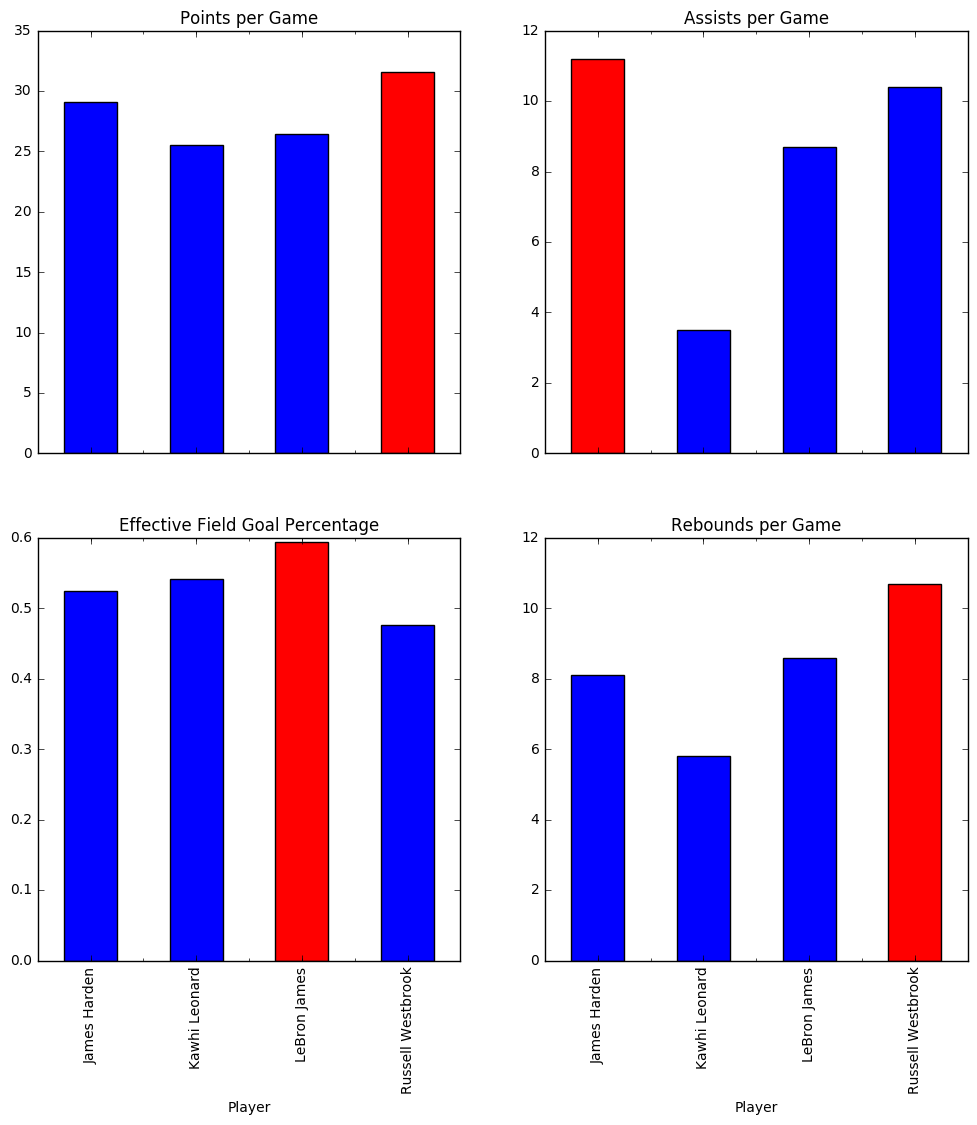

In [42]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12), sharex=True, sharey=False)
MVP['PTS'].plot.bar(ax=axes[0,0], color = ['b', 'b', 'b', 'r']); axes[0,0].set_title('Points per Game')
MVP['eFG%'].plot.bar(ax=axes[1,0], color = ['b', 'b', 'r', 'b']); axes[1,0].set_title('Effective Field Goal Percentage')
MVP['AST'].plot.bar(ax=axes[0,1], color = ['r', 'b', 'b', 'b']); axes[0,1].set_title('Assists per Game')
MVP['TRB'].plot.bar(ax=axes[1,1], color = ['b', 'b', 'b', 'r']); axes[1,1].set_title('Rebounds per Game')

Here we have displayed the most basic statistics for each of the MVP canidates, such as points, assists, steals and rebounds a game. As we can see, Westbrook had some of the highests totals in these categories. Westbrook was the second player in histroy to average double digits numbers in points, rebounds and assists in NBA histroy. Many believe that this fact alone should award him the title of MVP. However it is important to know that players who are renowned for their defense, such as Kawhi Leonard arent usually the leaders in these categories, so these statistics can paint an imcomplete picture of how good a player is.

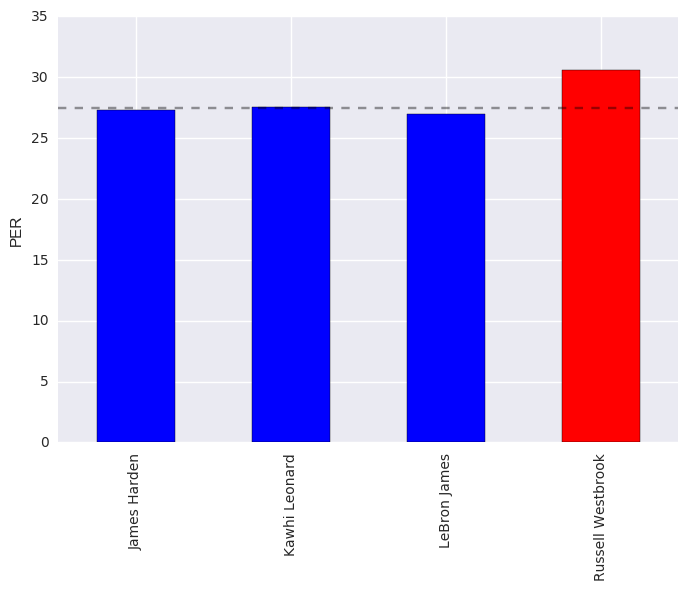

In [43]:
import seaborn as sns
fig, ax = plt.subplots()
MVP['PER'].plot(ax=ax, kind = 'bar', color = ['b', 'b', 'b', 'r'])
ax.set_ylabel('PER')
ax.set_xlabel('')
ax.axhline(historical['PER'].mean(), color = 'k', linestyle = '--', alpha = .4)

Player efficiency rating (PER) is a statistic meant to capture all aspects of a player's game to give a measure of overall performance. It is adjusted for pace and minutes and the league average is always 15.0 for comparison. Russell Westbrook leads all MVP candidates with a PER of 30.6. All candidates just about meet or surpass the historical MVP average of 27.42. However, PER is a little flawed as it is much more heavily weighted to offensive statistics. It only takes into account blocks and steals on the defensive side. This favors Westbrook and Harden, who put up stronger offensive numbers than Leonard and James. On the other hand, Westbrook and Harden are not known for being great defenders, while James, and especially Kawhi Leonard (who is a two-time Defensive Player of the Year winner), are two of the top defenders in the NBA.

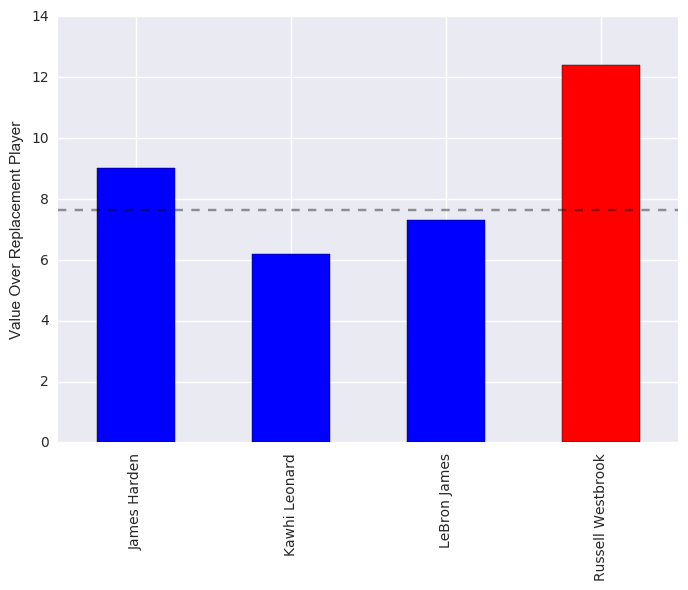

In [44]:
fig, ax = plt.subplots()
MVP['VORP'].plot(ax=ax, kind = 'bar', color = ['b', 'b', 'b', 'r'])
ax.set_ylabel('Value Over Replacement Player')
ax.set_xlabel('')
ax.axhline(historical['VORP'].mean(), color = 'k', linestyle = '--', alpha = .4)

According to Basketball Reference, Value over Replacement Player (VORP) provides an "estimate of each player's overall contribution to the team, measured vs. what a theoretical 'replacement player' would provide", where the 'replacement player' is defined as a player with a box plus/minus of -2. By this metric, Russell Westbrook contributes the most to his team, with a VORP of 12.4. Westbrook and James Harden are the only candidates with a VORP above the historical MVP average of 7.62.

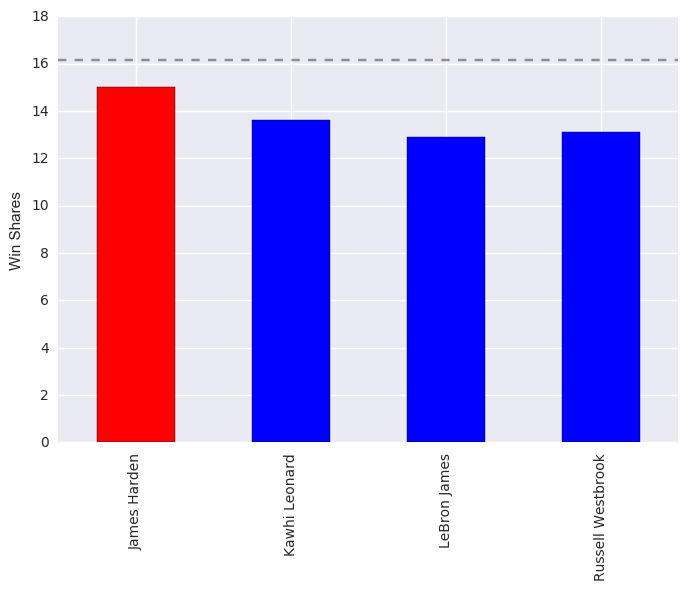

In [45]:
fig, ax = plt.subplots()
MVP['WS'].plot(ax=ax, kind = 'bar', color = ['r', 'b', 'b', 'b'])
ax.set_ylabel('Win Shares')
ax.set_xlabel('')
ax.axhline(historical['WS'].mean(), color = 'k', linestyle = '--', alpha = .4)

Win shares is a measure of wins a player produces for his team. This statistic is calculated by taking into account how many wins a player has contributed to their team based off of their offensive play, as well as their defensive play.

We can see that this past season, none of the MVP canidates genereated as many wins for their teams as the average MVP has, which is 16.13 games. James Harden was the closest with a Win share value of just over 15. To understand how meaninful this statisitc this, we also have to keep in mind the production that the rest of the MVP canidates team is putting up. We have to ask the question that if a player is putting up great statistics, but so are other players on the same team, how much impact is that one player really having.

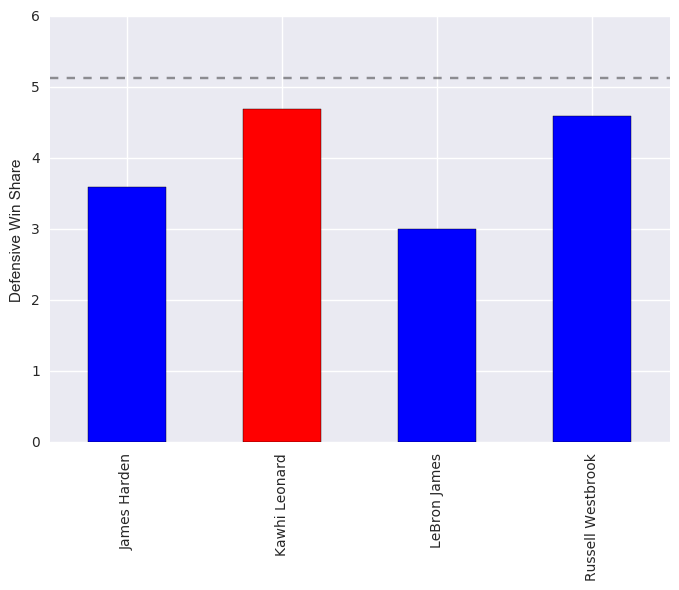

In [46]:
fig, ax = plt.subplots()
MVP['DWS'].plot(ax=ax, kind = 'bar', color = ['b', 'r', 'b', 'b'])
ax.set_ylabel('Defensive Win Share')
ax.set_xlabel('')
ax.axhline(historical['DWS'].mean(), color = 'k', linestyle = '--', alpha = .4)


Here we try to compare the defensive proudction of each of the MVP canidates. Defensive Win Share is calculated by looking at how a player's respective defensive production translates to wins for a team. A player's estimated points allowed per 100 possesions, marginal defense added, as well as points added in a win are all taken into account to calculate this number. Because points added in a win is used in this calculation, even though it is supposed to be a defensive statistic, there is still some offensive bias. So players that score more points, and win more games could get higher values for this statistic. Despite these possible flaws, we see that Leonard and Westbrook lead the way with DWS of 4.7 and 4.6 respectively. All players, still fall short of the historical MVP average of 5.1.

0.2609444444444444


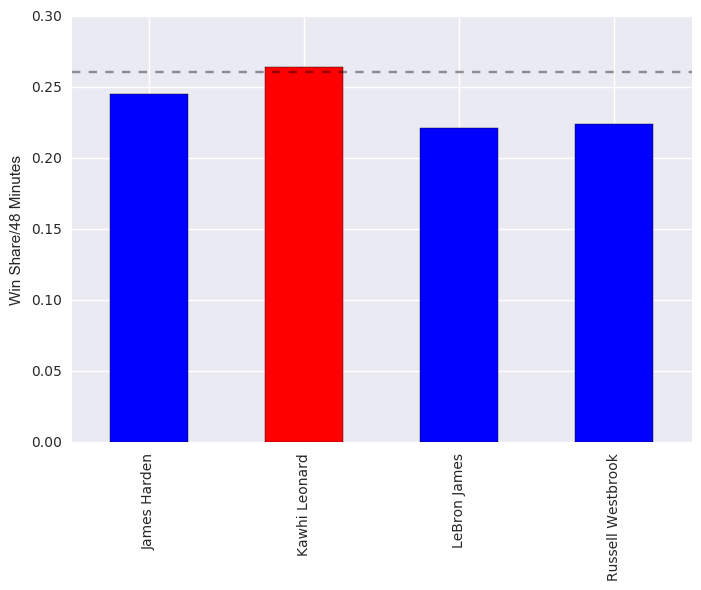

In [47]:
fig, ax = plt.subplots()
MVP['WS/48'].plot(ax=ax, kind = 'bar', color = ['b', 'r', 'b', 'b'])
ax.set_ylabel('Win Share/48 Minutes')
ax.set_xlabel('')
ax.axhline(historical['WS/48'].mean(), color = 'k', linestyle = '--', alpha = .4)
print(historical['WS/48'].mean())

Win Shares/ 48 Minutes is another statistic used to measure the wins attributed to a certain player. This statistic is slightly different because instead of just taking in to account how many games the team actually wins over the course of a season, this stat attempts to control for actual minutes played by the player. Here we see that Kawhi Leonard has the highest Win Share, and not Harden. We believe that this is due to the fact that Leonard plays significantly fewer minutes than the other canidates. Leonard is the only player whose WS/48 of .264 surpasses the MVP average of .261


29.77777777777778


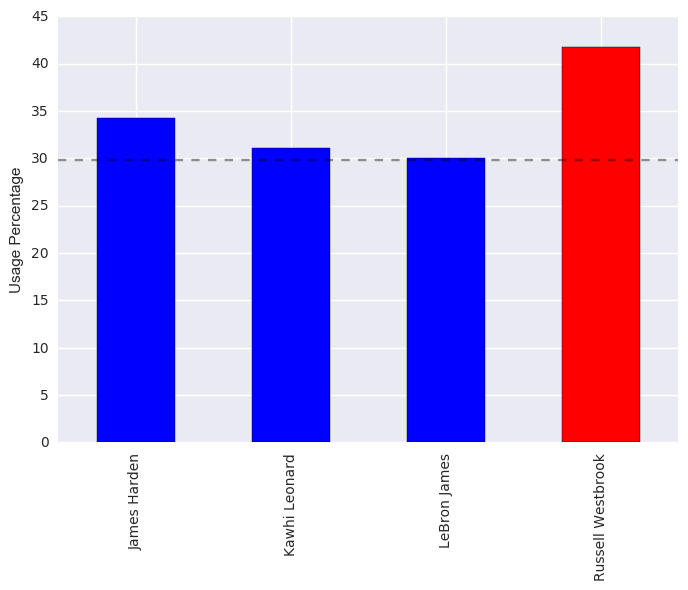

In [48]:
fig, ax = plt.subplots()
MVP['USG%'].plot(ax=ax, kind = 'bar', color = ['b', 'b', 'b', 'r'])
ax.set_ylabel('Usage Percentage')
ax.set_xlabel('')
ax.axhline(historical['USG%'].mean(), color = 'k', linestyle = '--', alpha = .4)
print(historical['USG%'].mean())

Usage percentage is a measure of the percentage of team possessions a player uses per game. A higher percentage means a player handles the ball more per game. High usage percentages by one player can often lead to decreased overall efficiency for the team, as it means the offense is ran more through one player. In this case, Russell Westbrook's usage percentage is considerably higher than the other candidates and is the highest usage percentage in NBA history by about 3%. The other candidates are much closer to the historical average MVP usage percentage of 29.77%.

In [49]:
url4 ='http://www.basketball-reference.com/play-index/tsl_finder.cgi?request=1&match=single&type=team_totals&lg_id=NBA&year_min=2017&year_max=2017&order_by=wins'
e1 = requests.get(url4)

In [50]:
soup4 = BeautifulSoup(e1.content, 'html.parser')

In [51]:
column_headers_past_adv = [th.getText() for th in 
                  soup4.findAll('tr')[1].findAll('th')]

In [52]:
data_rows_past_adv = soup4.findAll('tr')[2:]

In [53]:
column_headers_team = [th.getText() for th in 
                  soup4.findAll('tr')[1].findAll('th')]

In [54]:
data_rows_team = soup4.findAll('tr')[3:12]

In [55]:
team_wins = [[td.getText() for td in data_rows_team[i].findAll('td')]
            for i in range(len(data_rows_team))]

In [56]:
df_team = pd.DataFrame(team_wins, columns=column_headers_team[1:])

In [57]:
df_team = df_team.set_index('Tm')

In [58]:
df_team =df_team.drop(['TOR*','UTA*','LAC*','WAS*'])

In [59]:
Team =df_team

In [60]:
Team

,Season,Lg,G,W,L,W/L%,MP,FG,FGA,2P,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Tm,,,,,,,,,,,,,,,,,,,,,
SAS*,2016-17,NBA,82,61,21,.744,19805,3222,6864,2469,...,1806,822,2777,3599,1954,654,486,1101,1498,8637
HOU*,2016-17,NBA,82,55,27,.671,19780,3305,7152,2124,...,2177,892,2747,3639,2070,670,351,1241,1634,9458
BOS*,2016-17,NBA,82,53,29,.646,19755,3168,6978,2183,...,1903,744,2698,3442,2069,617,341,1088,1686,8857
CLE*,2016-17,NBA,82,51,31,.622,19880,3275,6963,2208,...,1913,767,2822,3589,1858,540,329,1122,1486,9048
OKC*,2016-17,NBA,82,47,35,.573,19805,3237,7169,2545,...,2113,1002,2821,3823,1721,648,408,1230,1715,8741


In [61]:
Team['W']['SAS*']

'61'

In [62]:
Hou_wins = int((Team['W']['HOU*']))
Harden_Wins = int(MVP['WS']['James Harden'])
Harden_winpct = Harden_Wins/Hou_wins
Harden_nonwin = 1 - Harden_winpct

SAS_wins = int((Team['W']['SAS*']))
Leo_Wins = int(MVP['WS']['Kawhi Leonard'])
Leo_winpct = Leo_Wins/SAS_wins
Leo_nonwin = 1 - Leo_winpct

Cle_wins = int((Team['W']['CLE*']))
LeBron_Wins = int(MVP['WS']['LeBron James'])
LeBron_winpct = LeBron_Wins/Cle_wins
LeBron_nonwin = 1 - LeBron_winpct

OKC_wins = int((Team['W']['OKC*']))
Westbrook_Wins = int(MVP['WS']['Russell Westbrook'])
Westbrook_winpct = Westbrook_Wins/OKC_wins
Westbrook_nonwin = 1 - Westbrook_winpct

In [63]:
df1 = ([Harden_winpct, Leo_winpct, LeBron_winpct, Westbrook_winpct])
df2 = ([Harden_nonwin, Leo_nonwin, LeBron_nonwin, Westbrook_nonwin])

In [64]:
df3 = pd.DataFrame(df1)
df4 = pd.DataFrame(df2)

In [65]:
Win_Share_Per = pd.concat([df3, df4], axis =1)

In [66]:
Win_Share_Per.columns = ['% Wins Accounted For', 'Rest of Team']
Win_Share_Per = Win_Share_Per.T
Win_Share_Per.columns = ['James Harden', 'Kawhi Leonard', 'LeBron James', 'Russell Westbrook']

In [67]:
pic1 = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201935.png", "201935.png")
pic2 = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/202695.png", "202695.png")
pic3 = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/2544.png", "2544.png")
pic4 = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/201566.png", "201566.png")
pic5 = urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/en/thumb/2/28/Houston_Rockets.svg/410px-Houston_Rockets.svg.png", "410px-Houston_Rockets.svg.png")
pic6 = urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/en/thumb/a/a2/San_Antonio_Spurs.svg/512px-San_Antonio_Spurs.svg.png", "512px-San_Antonio_Spurs.svg.png")
pic7 = urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/en/thumb/f/f7/Cleveland_Cavaliers_2010.svg/295px-Cleveland_Cavaliers_2010.svg.png", "295px-Cleveland_Cavaliers_2010.svg.png")
pic8 = urllib.request.urlretrieve("https://upload.wikimedia.org/wikipedia/en/thumb/5/5d/Oklahoma_City_Thunder.svg/250px-Oklahoma_City_Thunder.svg.png", "250px-Oklahoma_City_Thunder.svg.png")

In [68]:
harden_pic = plt.imread(pic1[0])
leonard_pic = plt.imread(pic2[0])
james_pic = plt.imread(pic3[0])
westbrook_pic = plt.imread(pic4[0])
rockets_pic = plt.imread(pic5[0])
spurs_pic = plt.imread(pic6[0])
cavaliers_pic = plt.imread(pic7[0])
thunder_pic = plt.imread(pic8[0])

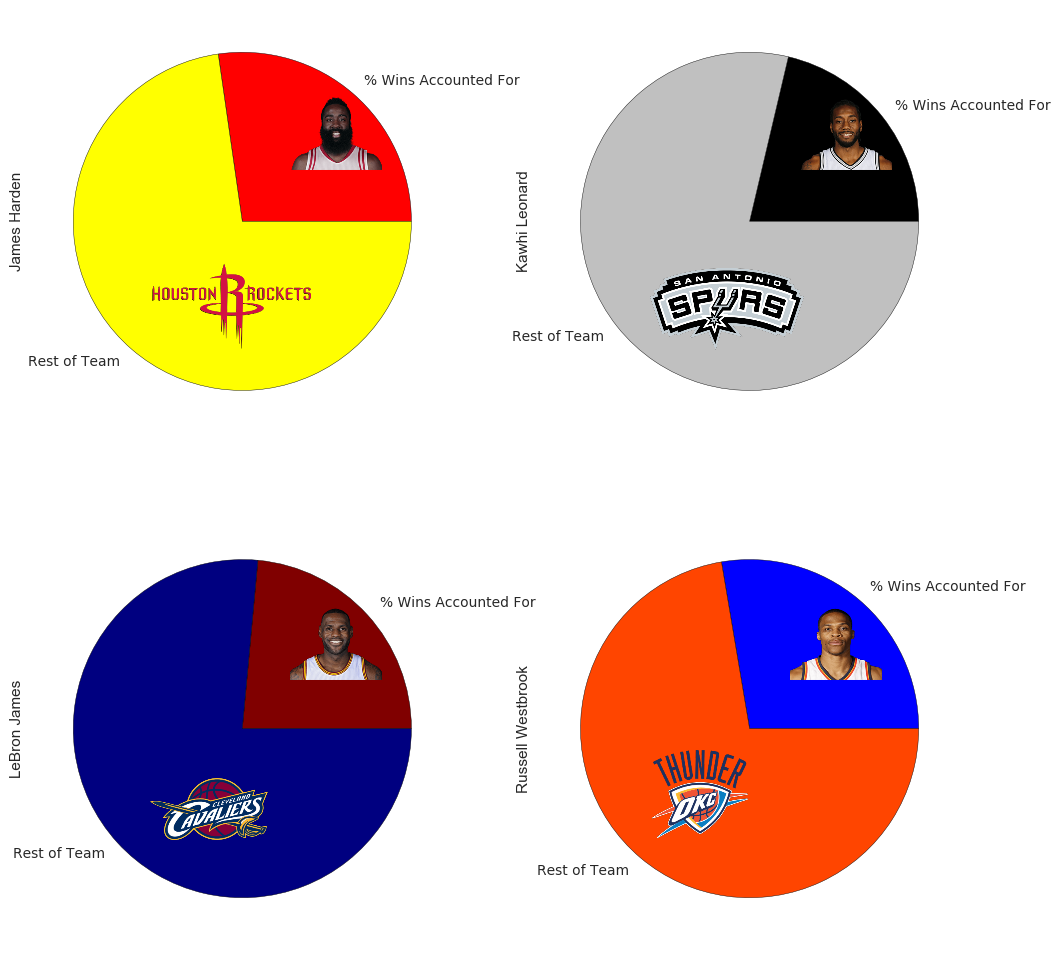

In [69]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,12))
Win_Share_Per['James Harden'].plot.pie(ax=axes[0,0], colors = ['r', 'yellow'])
Win_Share_Per['Kawhi Leonard'].plot.pie(ax=axes[0,1], colors = ['black', 'silver'])
Win_Share_Per['LeBron James'].plot.pie(ax=axes[1,0], colors = ['maroon', 'navy'])
Win_Share_Per['Russell Westbrook'].plot.pie(ax=axes[1,1], colors = ['blue', 'orangered'])
img1 = OffsetImage(harden_pic, zoom=0.4)
img1.set_offset((290,800))
a = axes[0,0].add_artist(img1)
a.set_zorder(10)
img2 = OffsetImage(leonard_pic, zoom=0.4)
img2.set_offset((800,800))
b= axes[0,1].add_artist(img2)
b.set_zorder(10)
img3 = OffsetImage(james_pic, zoom=0.4)
img3.set_offset((290,290))
c = axes[1,0].add_artist(img3)
c.set_zorder(10)
img4 = OffsetImage(westbrook_pic, zoom=0.4)
img4.set_offset((790,290))
d = axes[1,1].add_artist(img4)
d.set_zorder(10)
img5 = OffsetImage(rockets_pic, zoom=0.4)
img5.set_offset((150,620))
e = axes[1,1].add_artist(img5)
e.set_zorder(10)
img6 = OffsetImage(spurs_pic, zoom=0.3)
img6.set_offset((650,620))
f = axes[1,1].add_artist(img6)
f.set_zorder(10)
img7 = OffsetImage(cavaliers_pic, zoom=0.4)
img7.set_offset((150,130))
g = axes[1,1].add_artist(img7)
g.set_zorder(10)
img8 = OffsetImage(thunder_pic, zoom=0.4)
img8.set_offset((650,130))
h = axes[1,1].add_artist(img8)
h.set_zorder(10)
plt.show()

This graphic is meant to demonstrate what percentage of a team's win the respective MVP canidates are responsible for. We did this by taking the win shares for each player, and then diving by the number of wins the team had this season. Considering the fact that an NBA team has a roster of 12-14 players, each of the canidates accounted for an extremely high percentage of the teams wins, anywhere from 20%-30%. We see that Russell Westbrook and James Harden, the two leading canidates, accounted for the highest percentage of wins for their team.

## Conclusion

The data we have observed confirms that all four of these players have had amazing seasons, each excelling in different ways. All these players have had MVP-caliber seasons in their own ways, but only one can win the award. We believe that Harden and Westbrook have separated themselves from the other two players in therms of their win share percentage, as well as value added over replacement. Choosing between Harden and Westbrook is difficult because they have both put up incredible numbers this year. They were very comprabable in terms of the basic statistics such as points, assists and rebound, as well as value added to the team, but what differentiates Harden is how he put up those numbers compared to Westbook. While both players have the ability to take over and control the game, Harden had a much lower usage percentage, meaning he was able to get his teammates involved more and able to put up similar numbers in a much more efficient manner. In addition, Harden's team won more games, and in the playoffs, Harden has been able to take his team further than Westbrook has. An MVP is a player who is a difference maker who can continually win games for his team, and we believe that James Harden did a better job of that this year.